This script takes the 2016 DA Geometry file and the 2016 Statscan Census data, and creates a google Earth KMZ file for each province showing areas that are above and below certain population density thresholds.

Written by Tom Hastie
January 2020


In [1]:
%matplotlib inline


#import required libraries
from xml.etree import ElementTree as ET
from collections import defaultdict
from pyproj import Proj, transform, Transformer

import simplekml
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


In [2]:
#function stolen from the internet. 
#It takes an XML tree (in this case the Census Data) and turns it into a python dictionary object. 

def etree_to_dict(t):
    d = {t.tag: {} if t.attrib else None}
    children = list(t)
    if children:
        dd = defaultdict(list)
        for dc in map(etree_to_dict, children):
            for k, v in dc.items():
                dd[k].append(v)
        d = {t.tag: {k: v[0] if len(v) == 1 else v
                     for k, v in dd.items()}}
    if t.attrib:
        d[t.tag].update(('@' + k, v)
                        for k, v in t.attrib.items())
    if t.text:
        text = t.text.strip()
        if children or t.attrib:
            if text:
              d[t.tag]['#text'] = text
        else:
            d[t.tag] = text
    return d

In [5]:
#DA geometry file location 
file_xml = 'DA_shape_file\\lda_000b16g_e.gml'

In [6]:
# open up file and parse xml tree using ElementTree module
tree = ET.parse(file_xml)

In [7]:
#get the DA UID, Name, and position list from the XML file. 
#put them in a python list for further processing.
i = 0
DA_list = []


for t in tree.iter('{http://www.safe.com/gml/fme}lda_000b16g_e'):
    DA = {}
    i+=1
    #print(t.findall('{http://www.safe.com/gml/fme}DAUID')[0].text)
    DA['UID'] = int(t.findall('{http://www.safe.com/gml/fme}DAUID')[0].text)
    DA['ERNAME'] = t.findall('{http://www.safe.com/gml/fme}ERNAME')[0].text
    
    
    #if len(t.findall('{http://www.opengis.net/gml}surfaceProperty')) is not 1:
    #    print(len(t.findall('{http://www.opengis.net/gml}surfaceProperty')))
        
    surface_list = []
    
    for surface in t.findall('{http://www.opengis.net/gml}surfaceProperty'):
        if surface:
            di = etree_to_dict(surface)
            surface_list.append(di)
            DA['surfaceProperty'] = surface_list
            #print(di)
        else:
            print(DA['UID'], DA['ERNAME'])
    for surface in t.findall('{http://www.opengis.net/gml}multiSurfaceProperty'):
        #print(surface)
        print(DA['UID'])
        print(DA['ERNAME'])
        di = etree_to_dict(surface)
        point_list = di['{http://www.opengis.net/gml}multiSurfaceProperty']['{http://www.opengis.net/gml}MultiSurface']['{http://www.opengis.net/gml}surfaceMember']
        print(len(point_list))
        print("Start_List")
        multi_surface_list = []
        for l in point_list:
            multi_surface_list.append(l['{http://www.opengis.net/gml}Surface']['{http://www.opengis.net/gml}patches']['{http://www.opengis.net/gml}PolygonPatch']['{http://www.opengis.net/gml}exterior']['{http://www.opengis.net/gml}LinearRing']['{http://www.opengis.net/gml}posList'])
        DA['multiSurface'] = multi_surface_list
        print("End_list")
    DA_list.append(DA)
print(i)

10010497
Avalon Peninsula
4
Start_List
End_list
10010503
Avalon Peninsula
3
Start_List
End_list
10010504
Avalon Peninsula
4
Start_List
End_list
10010520
Avalon Peninsula
3
Start_List
End_list
10010556
Avalon Peninsula
4
Start_List
End_list
10010522
Avalon Peninsula
2
Start_List
End_list
10010558
Avalon Peninsula
5
Start_List
End_list
10010535
Avalon Peninsula
2
Start_List
End_list
10010537
Avalon Peninsula
2
Start_List
End_list
10010685
Avalon Peninsula
2
Start_List
End_list
10010686
Avalon Peninsula
3
Start_List
End_list
10010714
Avalon Peninsula
12
Start_List
End_list
10010681
Avalon Peninsula
3
Start_List
End_list
10010682
Avalon Peninsula
80
Start_List
End_list
10010722
Avalon Peninsula
2
Start_List
End_list
10010724
Avalon Peninsula
4
Start_List
End_list
10010698
Avalon Peninsula
4
Start_List
End_list
10010709
Avalon Peninsula
9
Start_List
End_list
10010719
Avalon Peninsula
4
Start_List
End_list
10010765
Avalon Peninsula
3
Start_List
End_list
10010737
Avalon Peninsula
10
Start_Lis

5
Start_List
End_list
12060118
Southern / Sud
3
Start_List
End_list
12060120
Southern / Sud
5
Start_List
End_list
12060147
Southern / Sud
2
Start_List
End_list
12060135
Southern / Sud
16
Start_List
End_list
12060137
Southern / Sud
8
Start_List
End_list
12060138
Southern / Sud
4
Start_List
End_list
12060144
Southern / Sud
14
Start_List
End_list
12070163
Annapolis Valley
3
Start_List
End_list
11030165
Prince Edward Island / Île-du-Prince-Édouard
6
Start_List
End_list
11020249
Prince Edward Island / Île-du-Prince-Édouard
2
Start_List
End_list
11020250
Prince Edward Island / Île-du-Prince-Édouard
2
Start_List
End_list
11020251
Prince Edward Island / Île-du-Prince-Édouard
2
Start_List
End_list
10070544
Notre Dame--Central Bonavista Bay
3
Start_List
End_list
12070123
Annapolis Valley
2
Start_List
End_list
11030099
Prince Edward Island / Île-du-Prince-Édouard
3
Start_List
End_list
12030054
Southern / Sud
2
Start_List
End_list
12030056
Southern / Sud
2
Start_List
End_list
12030057
Southern / S

End_list
13150343
Campbellton--Miramichi
2
Start_List
End_list
13140135
Campbellton--Miramichi
2
Start_List
End_list
13150322
Campbellton--Miramichi
2
Start_List
End_list
13150323
Campbellton--Miramichi
3
Start_List
End_list
24010032
Gaspésie--Îles-de-la-Madeleine
2
Start_List
End_list
24010038
Gaspésie--Îles-de-la-Madeleine
5
Start_List
End_list
24020036
Gaspésie--Îles-de-la-Madeleine
4
Start_List
End_list
24100130
Bas-Saint-Laurent
6
Start_List
End_list
24020060
Gaspésie--Îles-de-la-Madeleine
4
Start_List
End_list
24030053
Gaspésie--Îles-de-la-Madeleine
2
Start_List
End_list
24030056
Gaspésie--Îles-de-la-Madeleine
2
Start_List
End_list
24030058
Gaspésie--Îles-de-la-Madeleine
2
Start_List
End_list
24110038
Bas-Saint-Laurent
3
Start_List
End_list
24110040
Bas-Saint-Laurent
2
Start_List
End_list
24110041
Bas-Saint-Laurent
2
Start_List
End_list
24120050
Bas-Saint-Laurent
3
Start_List
End_list
24050064
Gaspésie--Îles-de-la-Madeleine
3
Start_List
End_list
24030060
Gaspésie--Îles-de-la-Made

35140246
Muskoka--Kawarthas
2
Start_List
End_list
35120357
Kingston--Pembroke
2
Start_List
End_list
35100088
Kingston--Pembroke
2
Start_List
End_list
35120371
Kingston--Pembroke
2
Start_List
End_list
35120374
Kingston--Pembroke
3
Start_List
End_list
35110101
Kingston--Pembroke
2
Start_List
End_list
35120100
Kingston--Pembroke
2
Start_List
End_list
35130043
Kingston--Pembroke
2
Start_List
End_list
35130044
Kingston--Pembroke
2
Start_List
End_list
35130042
Kingston--Pembroke
5
Start_List
End_list
35130077
Kingston--Pembroke
6
Start_List
End_list
35130078
Kingston--Pembroke
2
Start_List
End_list
35130058
Kingston--Pembroke
3
Start_List
End_list
35130070
Kingston--Pembroke
2
Start_List
End_list
35130071
Kingston--Pembroke
3
Start_List
End_list
35203174
Toronto
9
Start_List
End_list
35210839
Toronto
3
Start_List
End_list
35210381
Toronto
2
Start_List
End_list
35210384
Toronto
2
Start_List
End_list
35211812
Toronto
2
Start_List
End_list
35210644
Toronto
2
Start_List
End_list
35210645
Toronto

59150056
Lower Mainland--Southwest / Lower Mainland--Sud-ouest
2
Start_List
End_list
59210278
Vancouver Island and Coast / Île de Vancouver et la côte
13
Start_List
End_list
59170671
Vancouver Island and Coast / Île de Vancouver et la côte
4
Start_List
End_list
59170708
Vancouver Island and Coast / Île de Vancouver et la côte
2
Start_List
End_list
59170719
Vancouver Island and Coast / Île de Vancouver et la côte
2
Start_List
End_list
59170649
Vancouver Island and Coast / Île de Vancouver et la côte
2
Start_List
End_list
59190163
Vancouver Island and Coast / Île de Vancouver et la côte
2
Start_List
End_list
59190199
Vancouver Island and Coast / Île de Vancouver et la côte
3
Start_List
End_list
59190304
Vancouver Island and Coast / Île de Vancouver et la côte
16
Start_List
End_list
59190305
Vancouver Island and Coast / Île de Vancouver et la côte
15
Start_List
End_list
59210212
Vancouver Island and Coast / Île de Vancouver et la côte
3
Start_List
End_list
59152291
Lower Mainland--Southwe

2
Start_List
End_list
59430105
Vancouver Island and Coast / Île de Vancouver et la côte
293
Start_List
End_list
59490179
North Coast / Côte-nord
298
Start_List
End_list
59490182
North Coast / Côte-nord
7
Start_List
End_list
59470061
North Coast / Côte-nord
5
Start_List
End_list
59470062
North Coast / Côte-nord
139
Start_List
End_list
59470063
North Coast / Côte-nord
295
Start_List
End_list
59470066
North Coast / Côte-nord
5
Start_List
End_list
59470067
North Coast / Côte-nord
2
Start_List
End_list
59290177
Lower Mainland--Southwest / Lower Mainland--Sud-ouest
14
Start_List
End_list
61010032
Northwest Territories / Territoires du Nord-Ouest
5
Start_List
End_list
62080020
Nunavut
9
Start_List
End_list
62080025
Nunavut
13
Start_List
End_list
62080026
Nunavut
8
Start_List
End_list
62080021
Nunavut
6
Start_List
End_list
60010119
Yukon
24
Start_List
End_list
62040046
Nunavut
2
Start_List
End_list
62040059
Nunavut
8979
Start_List
End_list
62040071
Nunavut
2
Start_List
End_list
62050012
Nunavu

In [8]:
#function that converts the statscanada map projection into standard WGS84 for Google Earth
def CRS_to_LL(CRS):
    ll_list = []
    inProj = Proj(init='epsg:3347')
    outProj = Proj(init='epsg:4326')
    for (x1, y1) in CRS:
        ll_list.append(transform(inProj,outProj,x1,y1))
    #print(ll_list)
    return(ll_list)

In [9]:
#faster version of the function above. Use this one, not the one above.
def CRS_to_LL(CRS, transformer):
    points = []
    for pt in transformer.itransform(point_tuples):
        points.append(pt[::-1])
    #print(ll_list)
    return(points)

In [11]:
#this is a testing cell. Don't run this cell 
test_DA = DA_list[1]
print(test_DA['ERNAME'])
#print(test_DA)
#print(test_DA['surfaceProperty'][0]['{http://www.opengis.net/gml}surfaceProperty']['{http://www.opengis.net/gml}Surface']['{http://www.opengis.net/gml}patches']['{http://www.opengis.net/gml}PolygonPatch']['{http://www.opengis.net/gml}exterior']['{http://www.opengis.net/gml}LinearRing']['{http://www.opengis.net/gml}posList'])

point_string = test_DA['surfaceProperty'][0]['{http://www.opengis.net/gml}surfaceProperty']['{http://www.opengis.net/gml}Surface']['{http://www.opengis.net/gml}patches']['{http://www.opengis.net/gml}PolygonPatch']['{http://www.opengis.net/gml}exterior']['{http://www.opengis.net/gml}LinearRing']['{http://www.opengis.net/gml}posList']

#convert the point list to a list of tuples
point_list = [float(i) for i in point_string.split()]
#print(point_list)
lat_CRS = point_list[1::2]
lon_CRS = point_list[::2]
point_tuples = [(y,x) for x,y in zip(lat_CRS, lon_CRS)]

print(point_tuples)
#points = CRS_to_LL(point_tuples)

transformer = Transformer.from_crs("EPSG:3347", "EPSG:4326")
points = []
for pt in transformer.itransform(point_tuples):
    points.append(pt[::-1])
    

print(points)






Avalon Peninsula
[(8977202.17999922, 2150836.79428611), (8977136.27714422, 2150650.26857111), (8977122.46571422, 2150596.22857111), (8977121.26856922, 2150564.04571611), (8977135.12571422, 2150492.93428611), (8977101.92571422, 2150483.54571611), (8977072.04571422, 2150475.00571611), (8977012.79714422, 2150458.65714611), (8976892.28285422, 2150426.98857111), (8976780.99428422, 2150389.63143111), (8976722.28571422, 2150362.41714611), (8976698.84571422, 2150446.45428611), (8976704.47714422, 2150513.22285611), (8976702.44571422, 2150543.01428611), (8976687.14571422, 2150575.49714611), (8976654.18571422, 2150614.93428611), (8976697.98285422, 2150649.80857111), (8976732.69142922, 2150654.29428611), (8976829.66571422, 2150653.51428611), (8976843.76285422, 2150656.44571611), (8976876.24571422, 2150671.74571611), (8976934.30571422, 2150689.70571611), (8977008.34285422, 2150723.27428611), (8977035.83142922, 2150743.62857111), (8977084.90285422, 2150807.51143111), (8977103.28856922, 2150819.88000

In [12]:
#take the list of all DAs in Canada and transform their coordinates to WGS84.
#then they get put in a list called "LL_list"
LL_list = []
transformer = Transformer.from_crs("EPSG:3347", "EPSG:4326")
for DA in DA_list:
    #print(DA['UID'], DA['ERNAME'])
    if 'surfaceProperty' in DA:
        point_string = DA['surfaceProperty'][0]['{http://www.opengis.net/gml}surfaceProperty']['{http://www.opengis.net/gml}Surface']['{http://www.opengis.net/gml}patches']['{http://www.opengis.net/gml}PolygonPatch']['{http://www.opengis.net/gml}exterior']['{http://www.opengis.net/gml}LinearRing']['{http://www.opengis.net/gml}posList']
        #print(len(point_string))
        point_list = [float(i) for i in point_string.split()]
        lat_CRS = point_list[1::2]
        lon_CRS = point_list[::2]
        point_tuples = [(y,x) for x,y in zip(lat_CRS, lon_CRS)]
        #print(len(point_tuples))
        points = CRS_to_LL(point_tuples, transformer)
        #print(points[0])
        DA["ll_points"] = [points]

    if 'multiSurface' in DA:
        #print(len(DA['multiSurface']))
        points = []
        for poly in DA['multiSurface']:
            point_list = [float(i) for i in poly.split()]
            lat_CRS = point_list[1::2]
            lon_CRS = point_list[::2]
            point_tuples = [(y,x) for x,y in zip(lat_CRS, lon_CRS)]
            ll_points = CRS_to_LL(point_tuples, transformer)
            #print(ll_points[0:10])
            points.append(ll_points)
        DA['ll_points'] = points
    LL_list.append(DA)



In [13]:
#print a random DA to check to see that the cell above worked.
for DA in DA_list:
    if DA['UID'] == 62080024:
        print(DA)

{'UID': 62080024, 'ERNAME': 'Nunavut', 'surfaceProperty': [{'{http://www.opengis.net/gml}surfaceProperty': {'{http://www.opengis.net/gml}Surface': {'{http://www.opengis.net/gml}patches': {'{http://www.opengis.net/gml}PolygonPatch': {'{http://www.opengis.net/gml}exterior': {'{http://www.opengis.net/gml}LinearRing': {'{http://www.opengis.net/gml}posList': '5692727.89142989 3672467.17428446 5692835.75714489 3672415.73714446 5692863.30571489 3672451.53142946 5692915.68571489 3672512.39714446 5692998.10856989 3672443.89714446 5693019.75428489 3672424.44856946 5693034.16285488 3672410.67999946 5693058.90285489 3672390.88856946 5693090.88571489 3672368.22285446 5693110.69714489 3672358.03428446 5693133.93714489 3672347.12571446 5693196.04571489 3672329.01999946 5693275.59999989 3672318.47428446 5693287.42571489 3672312.19714446 5693303.95714489 3672313.20285446 5693337.03714489 3672329.93999946 5693405.32233989 3672332.44512446 5693242.36856989 3672202.27999946 5693072.65428489 3672110.894284

In [14]:
#make a list of polygons as well as a list of UIDs for each DA. 
poly_list = []
UID_list = []
for DA in LL_list:
    #print(DA.keys())
    if 'll_points' in DA:
        poly_list.append(DA['ll_points'])
        UID_list.append(DA['UID'])
        
#print(poly_list[0])
#print(UID_list)

In [16]:
#load the census population data
filename = ["2016_census_data\\T1901EN.CSV"]
in_df = pd.read_csv(filename[0], engine = None, encoding = 'utf-8')
in_df.drop(in_df.tail(6).index,inplace=True) #drop the last few rows which aren't data

In [17]:
print(in_df.head())

  Geographic code Province / territory, english Province / territory, french  \
0        10010165     Newfoundland and Labrador      Terre-Neuve-et-Labrador   
1        10010166     Newfoundland and Labrador      Terre-Neuve-et-Labrador   
2        10010167     Newfoundland and Labrador      Terre-Neuve-et-Labrador   
3        10010168     Newfoundland and Labrador      Terre-Neuve-et-Labrador   
4        10010169     Newfoundland and Labrador      Terre-Neuve-et-Labrador   

   Geographic code, Province / territory  Geographic code, Census division  \
0                                   10.0                            1001.0   
1                                   10.0                            1001.0   
2                                   10.0                            1001.0   
3                                   10.0                            1001.0   
4                                   10.0                            1001.0   

   Geographic code, Census subdivision  Population

In [18]:
#convert the Geographic ID to a numeric
in_df['Geographic code'] = pd.to_numeric(in_df['Geographic code'])

In [19]:
#had trouble putting a list of lists into a pandas cell... so lets make a dictionary for lookup. 
DA_positions = {}
DA_ERNAME = {}
for DA in DA_list:
    DAUID = DA['UID']
    DA_positions[DAUID] = DA['ll_points']
    DA_ERNAME[DAUID] = DA['ERNAME']
    

In [20]:
#get a list of the provinces in the census data. We'll use this to generate the file names of hte kmz
provinces = in_df['Province / territory, english'].unique()
print(provinces)

['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon' 'Northwest Territories' 'Nunavut']


In [21]:
#make a graph of land area available vs. population density. 

density_vector = [0, 0.1, 1,2,5, 10, 20, 25, 50]
area_vector = [0 for i in range(len(density_vector))]
print(density_vector)
print(area_vector)

[0, 0.1, 1, 2, 5, 10, 20, 25, 50]
[0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
total_area = 0

for idx, r in in_df.iterrows():
    land_area = r['Land area in square kilometres, 2016']
    pop_density = r['Population density per square kilometre, 2016']
    total_area+=land_area
    for i, d in enumerate(density_vector):
        if pop_density<=d:
            area_vector[i] += land_area
print(area_vector)
    
print(total_area)

[7097603.489999995, 7483713.049999991, 8308629.14999999, 8503106.729999987, 8684695.719999976, 8794122.489999974, 8872868.859999971, 8890088.399999969, 8923053.429999977]
8965590.680000143


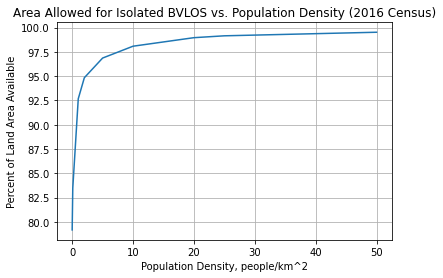

In [23]:

# Data for plotting
t = density_vector
#myList[:] = [x / myInt for x in myList]
s = [x*100/total_area for x in area_vector]

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Population Density, people/km^2', ylabel='Percent of Land Area Available',
       title='Area Allowed for Isolated BVLOS vs. Population Density (2016 Census)')
ax.grid()

fig.savefig("Landmass vs Pop Density.png")
plt.show()

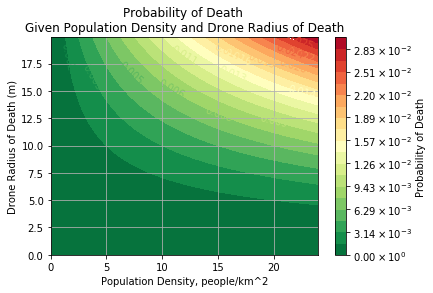

In [135]:
fig, ax = plt.subplots()
#levels = np.array([10**-5, 10**-4, 10**-3, 10**-2, 10**-1])
CS = ax.contourf(X, Y, PDeath, levels, cmap = "RdYlGn_r")
ax.clabel(CS, inline=1, fontsize=10)
ax.grid()
ax.set_title('Probability of Death \nGiven Population Density and Drone Radius of Death')
ax.set(xlabel='Population Density, people/km^2', ylabel='Drone Radius of Death (m)')



def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

#plt.colorbar(myplot, format=ticker.FuncFormatter(fmt))


# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(CS, format=ticker.FuncFormatter(fmt))
cbar.ax.set_ylabel('Probability of Death')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS)

fig.savefig("PDeath.png", dpi = 500)


2.9858450561954263e-05
[1e-07, 1e-06, 1e-05]


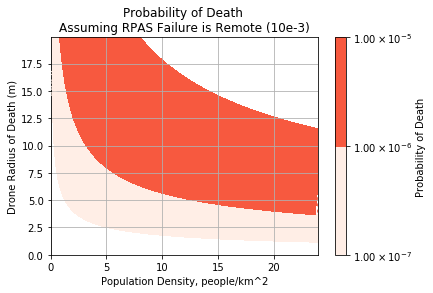

In [143]:
#make the graph again, but multiply everything by 10^-3 - which is a remote failure for a 34kJ RPAS. 

pop_delta = 1
Dr_delta = 0.1
pop = np.arange(0, 25, pop_delta)
Dr = np.arange(0, 20, Dr_delta)
X, Y = np.meshgrid(pop, Dr)
PDeath = np.pi*Y**2*X/1e6*1e-3

print(PDeath.max())


levels = np.linspace(PDeath.min(), PDeath.max(), 20)
levels = [1e-7, 1e-6, 1e-5]
#levels *= 1000000
#levels = np.around(levels, )
#levels /= 1000000
print(levels)

fig, ax = plt.subplots()
#levels = np.array([10**-5, 10**-4, 10**-3, 10**-2, 10**-1])
CS = ax.contourf(X, Y, PDeath, levels, cmap = "Reds")
ax.clabel(CS, inline=1, fontsize=10)
ax.grid()
ax.set_title('Probability of Death \nAssuming RPAS Failure is Remote (10e-3)')
ax.set(xlabel='Population Density, people/km^2', ylabel='Drone Radius of Death (m)')



def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

#plt.colorbar(myplot, format=ticker.FuncFormatter(fmt))


# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(CS, format=ticker.FuncFormatter(fmt))
cbar.ax.set_ylabel('Probability of Death')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS)

fig.savefig("PDeath with failure.png", dpi = 500)

In [20]:
#Main loop... go through each province, and for each make a kmz file that has GREEN
#for areas with less than the density_threshold number of people, and RED
#for areas with more. 


density_threshold =5

for province in provinces:
    print(province)
    province_df = in_df[in_df['Province / territory, english'] == province]
    
    kmz_filename = province + ".kmz"
    kml = simplekml.Kml()
    #kml.document.description = description_string
    high_density_folder = kml.newfolder(name=str("More than %d people per square kilometer."%density_threshold))
    low_density_folder  = kml.newfolder(name=str("Less than %d people per square kilometer."%density_threshold))
    for index, row in province_df.iterrows():
        DAUID = row['Geographic code']
        #print(DAUID)
        
        #fol = kml.newfolder(name=str(DAUID))
        if int(DAUID) in DA_positions:
            for i, ring in enumerate(DA_positions[int(DAUID)]):

                #create a description string for each polygon:
                description_string = "DA_UID: %s"%DAUID
                description_string += "\nPopulation: %s"%row['Population, 2016']
                description_string += "\nPopulation Density: %s"%row['Population density per square kilometre, 2016']
                #print(description_string)
                #print(i, len(ring))
                #print(ring)
                
                if row['Population density per square kilometre, 2016'] >= density_threshold:
                    pol = high_density_folder.newpolygon(name=DA_ERNAME[DAUID],
                                     outerboundaryis=ring,
                                        description=description_string)
                    pol.style.polystyle.color = simplekml.Color.changealphaint(200, simplekml.Color.red)
                else:
                    pol = low_density_folder.newpolygon(name=DA_ERNAME[DAUID],
                                     outerboundaryis=ring,
                                        description=description_string)
                    pol.style.polystyle.color = simplekml.Color.changealphaint(200, simplekml.Color.green)
                    
    #print(kml.kml())
    kml.savekmz(kmz_filename)

Newfoundland and Labrador
Prince Edward Island
Nova Scotia
New Brunswick
Quebec
Ontario
Manitoba
Saskatchewan
Alberta
British Columbia
Yukon
Northwest Territories
Nunavut


In [ ]:
#Main loop... go through each province, and for each make a kmz file that has show a range of population densities. 
#given a vector of densities make some coloured folders. 




density_threshold = [5, 10, 15, 20, 100, 200]
land_areas = [0.] * len(density_threshold)
print(land_areas)
#colours = red, orange, yellow, green, blue, purple
colours = ['99000000',
           simplekml.Color.blue, 
           simplekml.Color.green, 
           simplekml.Color.yellow, 
           simplekml.Color.orange,
           simplekml.Color.red]
#colours = [simplekml.Color.yellow, simplekml.Color.red]



for province in provinces:
    print(province)
    province_df = in_df[in_df['Province / territory, english'] == province]
    
    kmz_filename = province + ".kmz"
    kml = simplekml.Kml()
    #kml.document.description = description_string
    folder1 = kml.newfolder(name=str("More than %d people per square kilometer."%density_threshold[0]))
    folder2  = kml.newfolder(name=str("More than %d people per square kilometer."%density_threshold[1]))
    folder3  = kml.newfolder(name=str("More than %d people per square kilometer."%density_threshold[2]))
    folder4  = kml.newfolder(name=str("More than %d people per square kilometer."%density_threshold[3]))
    folder5  = kml.newfolder(name=str("More than %d people per square kilometer."%density_threshold[4]))
    folder6  = kml.newfolder(name=str("More than %d people per square kilometer."%density_threshold[5]))
    folders = [folder1, folder2, folder3, folder4, folder5, folder6]
    for index, row in province_df.iterrows():
        DAUID = row['Geographic code']
        #print(DAUID) 
        
        #fol = kml.newfolder(name=str(DAUID))
        if int(DAUID) in DA_positions:
            for i, ring in enumerate(DA_positions[int(DAUID)]):

                #create a description string for each polygon:
                description_string = "DA_UID: %s"%DAUID
                description_string += "\nPopulation: %s"%row['Population, 2016']
                description_string += "\nPopulation Density: %s"%row['Population density per square kilometre, 2016']
                #print(description_string)
                #print(i, len(ring))
                #print(ring)
                
                for i, density in enumerate(density_threshold):
                    if row['Population density per square kilometre, 2016'] >= density:
                        pol = folders[i].newpolygon(name=DA_ERNAME[DAUID],
                                         outerboundaryis=ring,
                                            description=description_string)
                        pol.style.polystyle.color = simplekml.Color.changealphaint(200, colours[i])
                        #sum the land area so we can figure out how much land is covered by each population density.
                        land_areas[i] += row['Land area in square kilometres, 2016']
    print(land_areas)
                    
    #print(kml.kml())
    #print(land_areas)
    kml.savekmz(kmz_filename)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Newfoundland and Labrador
[17955.429999999982, 6235.97, 4749.04, 3814.1799999999985, 841.9799999999997, 345.4999999999998]
Prince Edward Island
[25181.900000000005, 9603.239999999996, 6401.639999999996, 5003.779999999995, 999.29, 450.3699999999998]
Nova Scotia
[55551.77999999966, 28860.21999999994, 21229.169999999973, 15883.169999999978, 2111.149999999996, 1101.1500000000008]
New Brunswick
[76512.45999999999, 41029.58999999985, 29888.00999999985, 21569.069999999858, 3064.469999999995, 1605.600000000003]


In [ ]:
#Make a separate file for each population density



density_threshold = [5, 10, 15, 25]
land_areas = [0.] * len(density_threshold)
print(land_areas)
#colours = red, orange, yellow, green, blue, purple
colours = ['99000000',
           simplekml.Color.blue, 
           simplekml.Color.green, 
           simplekml.Color.yellow, 
           simplekml.Color.orange,
           simplekml.Color.red]




for density in density_threshold:
    print(density)
    density_df = in_df[in_df['Population density per square kilometre, 2016'] > density]
    
    kmz_filename = str(density) + ".kmz"
    kml = simplekml.Kml()
    #kml.document.description = description_string
    folder1 = kml.newfolder(name=str("More than %d people per square kilometer."%density))
    folders = [folder1]
    for index, row in density_df.iterrows():
        DAUID = row['Geographic code']
        #print(DAUID)
        
        #fol = kml.newfolder(name=str(DAUID))
        if int(DAUID) in DA_positions:
            for i, ring in enumerate(DA_positions[int(DAUID)]):

                #create a description string for each polygon:
                description_string = "DA_UID: %s"%DAUID
                description_string += "\nPopulation: %s"%row['Population, 2016']
                description_string += "\nPopulation Density: %s"%row['Population density per square kilometre, 2016']
                #print(description_string)
                #print(i, len(ring))
                #print(ring)
                
                
                pol = folders[0].newpolygon(name=DA_ERNAME[DAUID],
                                 outerboundaryis=ring,
                                    description=description_string)
                pol.style.polystyle.color = simplekml.Color.changealphaint(200, colours[5])
                #sum the land area so we can figure out how much land is covered by each population density.
                #land_areas[i] += row['Land area in square kilometres, 2016']
    print(land_areas)
                    
    #print(kml.kml())
    #print(land_areas)
    kml.savekmz(kmz_filename)